# Shah-Zaman Estimator: Preliminary tests

In [3]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import operator
import math
import time

from ipywidgets import interact

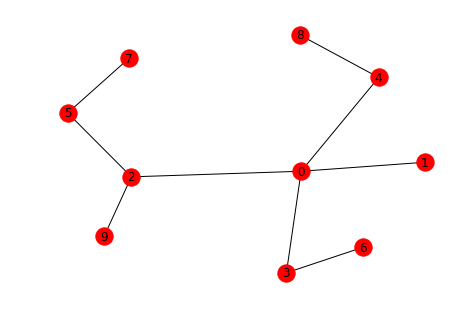

In [4]:
ba=nx.barabasi_albert_graph(10,1)
nx.draw(ba,with_labels=True)
plt.show()

bfs=nx.bfs_tree(ba,3)
print bfs.edges()
print bfs.nodes()
pos=nx.shell_layout(bfs)
nx.draw(bfs,pos,with_labels=True)
plt.show()

In [6]:
A=nx.adjacency_matrix(bfs)

print(bfs.nodes())
print(A.todense())
print(A)

In [6]:
def children(Gbfs,v):
    #Gbfs has to be a bfs tree
    start_time=time.time() #TIME
    child=[]
    for i in Gbfs.edges(v):
        child.append(i[1])
    final_time= -start_time +time.time()
    #print final_time
    return child

children(bfs,0)

In [8]:
def children2(Gbfs,v):
    start_time=time.time() #TIME
    A=nx.adjacency_matrix(Gbfs)
    nodes=Gbfs.nodes()
    children=[]
    for i in nodes:
        if A[v,i]==1:
            children.append(i)
    final_time= -start_time +time.time()
    print final_time
    return children

children2(bfs,0)

In [10]:
def parent(Gbfs,v):
    #Gbfs has to be a bfs tree
    start_time=time.time() #TIME
    parent='none'
    edges=list(Gbfs.edges())
    for i,j in edges:
        if j==v:
            parent=i
            return parent
    if parent=='none':
        print 'v is the root'
        
    final_time1= -start_time +time.time()
    #print final_time1

parent(bfs,9)

In [12]:
def parent2(Gbfs,v):
    #Gbfs has to be a bfs tree
    start_time=time.time() #TIME
    parent='none'
    A=nx.adjacency_matrix(Gbfs)
    nodes=Gbfs.nodes()
    for i in nodes:
        if A[i,v]==1:
            parent=i
            break
    final_time= -start_time +time.time()
    print final_time
    return parent

parent2(bfs,9)

In [14]:
def t_up(Gbfs,v):
    start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children(Gbfs,i)==[]:
            leaves.append(i)
    
    if v in leaves:
        T=1
    else:
        child=children(Gbfs,v)
        for j in child:
            T=t_up(Gbfs,j)+T
    final_time= -start_time +time.time()
    #print final_time
    return T

t_up(bfs,2)

In [16]:
def t_up2(Gbfs,v):
    start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children2(Gbfs,i)==[]:
            leaves.append(i)
    
    if v in leaves:
        T=1
    else:
        child=children2(Gbfs,v)
        for j in child:
            T=t_up2(Gbfs,j)+T
    final_time= -start_time +time.time()
    print final_time
    return T

t_up2(bfs,5)

In [18]:
def p_up(Gbfs,v):
    start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children(Gbfs,i)==[]:
            leaves.append(i)
    if v in leaves:
        T=1
    else:
        child=children(Gbfs,v)
        for j in child:
            T=T*p_up(Gbfs,j)
        T=T*t_up(Gbfs,v)
    final_time= -start_time +time.time()
    print final_time
    return T


p_up(bfs,0)

In [20]:
def p_up2(Gbfs,v):
    start_time=time.time() #TIME
    leaves=[]
    T=1
    nodes=Gbfs.nodes()
    for i in nodes:
        if children2(Gbfs,i)==[]:
            leaves.append(i)
    if v in leaves:
        T=1
    else:
        child=children2(Gbfs,v)
        for j in child:
            T=T*p_up2(Gbfs,j)
        T=T*t_up2(Gbfs,v)
    final_time= -start_time +time.time()
    print final_time
    return T


p_up2(bfs,0)

In [22]:
def r_down(Gbfs,v,root):
    #rumor centrality of v
    start_time=time.time() #TIME
    leaves=[]
    N=Gbfs.number_of_nodes()
    
    if v==root:
        T=float(1)
        child=children(Gbfs,v)
        for i in child:
            T=T/p_up(Gbfs,i)
        T=T*math.factorial(N-1)
        
    else:
        T=r_down(Gbfs,parent(Gbfs,v),root)*t_up(Gbfs,v)/(N-t_up(Gbfs,v))
    return T


r_down(bfs,0,0)

In [24]:
def r_down2(Gbfs,v,root):
    #rumor centrality of v
    leaves=[]
    N=Gbfs.number_of_nodes()
    
    if v==root:
        T=float(1)
        child=children2(Gbfs,v)
        for i in child:
            T=T/p_up2(Gbfs,i)
        T=T*math.factorial(N-1)
        
    else:
        T=r_down2(Gbfs,parent2(Gbfs,v),root)*t_up2(Gbfs,v)/(N-t_up2(Gbfs,v))
    return T


r_down2(bfs,0,0)

In [26]:
def sz(G):
    nodes=list(G.nodes())
    root=random.choice(nodes)
    #print 'root',root
    Gbfs=nx.bfs_tree(G,root)
    rumor_centralities=[]
    for i in nodes:
        rumor_centralities.append((i,r_down(Gbfs,i,root)))
    L=sorted(rumor_centralities,key=itemgetter(1))
    return L[len(L)-1][0],L[len(L)-1][1]

In [27]:
def sz2(G):
    nodes=list(G.nodes())
    root=random.choice(nodes)
    #print 'root',root
    Gbfs=nx.bfs_tree(G,root)
    rumor_centralities=[]
    for i in nodes:
        rumor_centralities.append((i,r_down2(Gbfs,i,root)))
    L=sorted(rumor_centralities,key=itemgetter(1))
    return L[len(L)-1][0],L[len(L)-1][1]

In [30]:
results_sz=[]
results_sz_time={}
resultsSZ={}
values_sz={}

20


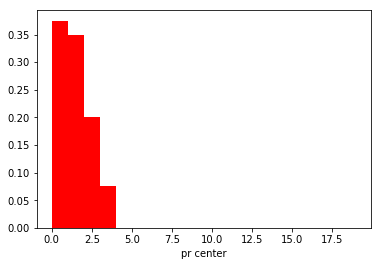

In [67]:
graph_size=[20]
for N in graph_size:
    start_time=time.time()
    for i in range(0,10):
        ba=nx.barabasi_albert_graph(N,1)
        v,rc=sz(ba)
        results_sz.append([N,v,rc])
    final_time= -start_time +time.time()
    results_sz_time[str(N)]=final_time
    
    resultsSZ[str(N)]=[i[1] for i in results_sz ]
    %matplotlib inline
    values, bins, _ =plt.hist(resultsSZ[str(N)], bins=range(0,N),color='r',normed=True)
    values_sz[str(N)]=list(values)
    plt.ylabel('');
    plt.xlabel('pr center')
    print N

In [68]:
    print results_sz_time

{'10': 2.3903989791870117, '15': 8.542572975158691, '20': 21.07187795639038}


In [70]:
results_sz2=[]
results_sz2_time={}
resultsSZ2={}
values_sz2={}

10


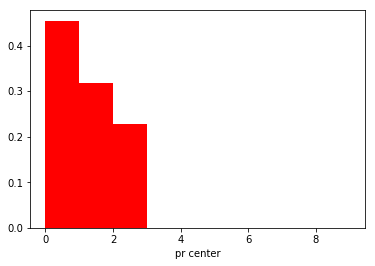

In [73]:
graph_size=[10]
for N in graph_size:
    start_time=time.time()
    for i in range(0,10):
        ba=nx.barabasi_albert_graph(N,1)
        v,rc=sz2(ba)
        results_sz2.append([N,v,rc])
    final_time= -start_time +time.time()
    results_sz2_time[str(N)]=final_time
    
    resultsSZ2[str(N)]=[i[1] for i in results_sz2 ]
    %matplotlib inline
    values, bins, _ =plt.hist(resultsSZ2[str(N)], bins=range(0,N),color='r',normed=True)
    values_sz2[str(N)]=list(values)
    plt.ylabel('');
    plt.xlabel('pr center')
    print N

In [74]:
    print results_sz2_time

{'10': 45.161887884140015}


In [376]:
results_sz

[[15, 0, 1210809600.0],
 [15, 2, 1816214400.0],
 [15, 1, 2421619200.0000005],
 [15, 0, 7264857600.0],
 [15, 3, 57657600.0],
 [15, 1, 172972800.0],
 [15, 1, 726485760.0000001],
 [15, 0, 1210809600.0],
 [15, 0, 1614412800.0],
 [15, 0, 113513400.0]]

In [377]:
results_sz_time

{'15': 4.053714990615845}

In [378]:
resultsSZ

{'15': [0, 2, 1, 0, 3, 1, 1, 0, 0, 0]}

In [379]:
values_pr

{'15': [0.5,
  0.29999999999999999,
  0.10000000000000001,
  0.10000000000000001,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

### A simple root-finding algorithm

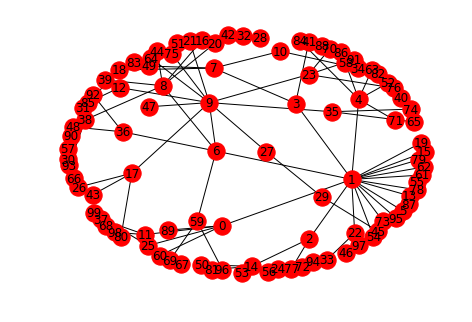

In [28]:
ba=nx.barabasi_albert_graph(100,1)
nx.draw(ba,with_labels=True)
plt.show()

In [29]:
def subsize(G,u):
    subtrees_size=[]
    if u in G.nodes():
        Gbfs=nx.bfs_tree(G,u)
        for i in G.nodes():
            if u!=i:
                subtrees_size.append(t_up(Gbfs,i))
        return max(subtrees_size)

In [30]:
print subsize(ba,8)
print subsize(ba,3)
print subsize(ba,6)

89
91
54


In [49]:
def simple(G):
    all_sub=[]
    for v in G.nodes():
        all_sub.append([v,subsize(G,v)])
    all_sub=sorted(all_sub,key=itemgetter(1))
    return all_sub

In [50]:
simple_rfa=simple(ba)
print simple_rfa

[[2, 3], [1, 7], [0, 9], [3, 9], [4, 9], [5, 9], [6, 9], [7, 9], [8, 9], [9, 9]]


In [51]:
epsilon=.2
K=2.5*math.log(1/epsilon)/epsilon
K=int(math.ceil(K))
print K

21


In [52]:
print simple_rfa[:K]

[[2, 3], [1, 7], [0, 9], [3, 9], [4, 9], [5, 9], [6, 9], [7, 9], [8, 9], [9, 9]]


In [53]:
for i in [30,40,50]:#,60,70,80,90,100,120,140,160]:
    ba=nx.barabasi_albert_graph(i,1)
    simple_rfa=simple(ba)
    
    print 'i=',i
    simple_center=simple_rfa[0][0]
    print simple_rfa[:K]
    print simple_center

i= 30
[[0, 12], [1, 18], [4, 22], [5, 24], [8, 24], [6, 26], [18, 27], [2, 28], [17, 28], [3, 29], [7, 29], [9, 29], [10, 29], [11, 29], [12, 29], [13, 29], [14, 29], [15, 29], [16, 29], [19, 29], [20, 29]]
0
i= 40
[[0, 11], [1, 29], [4, 30], [7, 30], [5, 32], [2, 33], [13, 34], [9, 35], [21, 37], [25, 37], [29, 37], [18, 38], [27, 38], [3, 39], [6, 39], [8, 39], [10, 39], [11, 39], [12, 39], [14, 39], [15, 39]]
0
i= 50
[[1, 20], [2, 30], [5, 40], [4, 41], [17, 41], [10, 47], [0, 48], [3, 48], [18, 48], [29, 48], [33, 48], [39, 48], [6, 49], [7, 49], [8, 49], [9, 49], [11, 49], [12, 49], [13, 49], [14, 49], [15, 49]]
1


In [117]:
results_Simple={} #This dict contains all the vrtices found by the dc estimator for different graph sizes
values_Simple={} #This dict is created from resultsDC
results_Simple_time={}
resultsSim={}

In [ ]:
graph_size=[10,20,30]#,140,160,180,200,300]

for N in graph_size:
    results_Simple=[]
    start_time=time.time()
    for i in range(0,500):
        print i
        ba=nx.barabasi_albert_graph(N,1)
        simple_rfa=simple(ba)
        simple_center=simple_rfa[0][0]
        results_Simple.append([N,simple_center])
    final_time= -start_time +time.time()
    results_Simple_time[str(N)]=final_time

    resultsSim[str(N)]=[i[1] for i in results_Simple ]
    %matplotlib inline
    values, bins, _ =plt.hist(resultsSim[str(N)], bins=range(0,N),color='m',normed=True)
    values_Simple[str(N)]=list(values)
    plt.ylabel('');
    plt.xlabel('simple center')
    print N

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [120]:
resultsSim

{'30': [2,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  2,
  1,
  0,
  1,
  1,
  2,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  4,
  4,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  2,
  1,
  1,
  4,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  4,
  0,
  4,
  1,
  3,
  1,
  2,
  2,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  3,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  2,
  0,
  0,
  1,
  0,
  3,
  6,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  2,
  0,
  1,
  0,
  0,
  3,
  1,
  0,
  2,
  2,
  4,
  3,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  2,
  1,
  4,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  3,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  2,
  0,
  1,
  1,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  1,
  0,
  2,
  0,

Exporting the results

In [121]:
simple_results = open('simpleSim500.txt', 'w')
for i in [30,40,50]:#[100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,4000,5000,10000]:
  print>>simple_results, str(i),resultsSim[str(i)]
simple_results.close()

Importing the results

In [ ]:
infosimple= open("simpleSim500.txt").read().split()
imported_simple=[i for i in infosimple]
Sim={}
j=1
for N in [100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,4000,5000,10000]:
    Sim[str(N)]=imported_simple[j:j+500]
    j=j+501

ll=0
for N in [100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,4000,5000,10000]:
    for k in range(len(Sim[str(N)])):
        Sim[str(N)][k]=Sim[str(N)][k][:-1]
        for l in Sim[str(N)][k]:
            if l=='[':
                Sim[str(N)][k]=Sim[str(N)][k][1:]
            if l==']':
                Sim[str(N)][k]=Sim[str(N)][k]
for N in [100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,4000,5000,10000]:
    for k in range(len(Sim[str(N)])):
        Sim[str(N)][k]=int(Sim[str(N)][k])
print Sim['10000']

#### Confindence sets for the Simple Algorithm

In this section we will see how a confidence set appears...

In [54]:
def confset_sa(l):
    index=0
    for i in range(0,len(l)):
        if l[i][0]==0:
            return index
            break
        index=index+1

First step: Simulations 

In [55]:
results_Simple_CF={} #This dict contains all the vrtices found by the dc estimator for different graph sizes
values_Simple_CF={} #This dict is created from resultsDC
results_Simple_time_CF={}
resultsSim_CF={}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

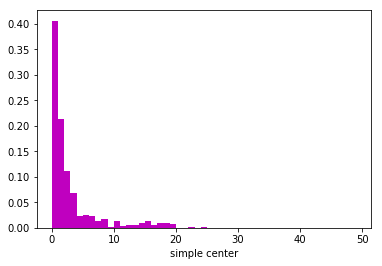

In [67]:
graph_size=[10,20,30,50]

for N in graph_size:
    results_Simple_CF=[]
    start_time=time.time()
    for i in range(0,500):
        print i
        ba=nx.barabasi_albert_graph(N,1)
        simple_rfa=simple(ba)
        #print simple_rfa
        cs_size=confset_sa(simple_rfa)
        #print 'size',cs_size
        results_Simple_CF.append([N,cs_size])
    final_time= -start_time +time.time()
    results_Simple_time_CF[str(N)]=final_time

    resultsSim_CF[str(N)]=[i[1] for i in results_Simple_CF ]
    %matplotlib inline
    values, bins, _ =plt.hist(resultsSim_CF[str(N)], bins=range(0,N),color='m',normed=True)
    values_Simple_CF[str(N)]=list(values)
    plt.ylabel('');
    plt.xlabel('simple center')
    print N

In [70]:
#Exporting
simple_results_CF = open('simpleCFSim500.txt', 'w')
for i in [10,20,30,50,100]:#[100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,4000,5000,10000]:
  print>>simple_results_CF, str(i),resultsSim_CF[str(i)]
simple_results_CF.close()

In [71]:
results_Simple_time_CF

{'10': 12.384675979614258,
 '100': 21738.819755792618,
 '20': 117.13060903549194,
 '30': 624.6115021705627,
 '50': 2678.658173084259}

In [2]:
#Importing
infosimple_CF= open("simpleCFSim500.txt").read().split()
imported_simple_CF=[i for i in infosimple_CF]
SimCF={}
j=1
for N in [10,20,30,50,100]:
    SimCF[str(N)]=imported_simple_CF[j:j+500]
    j=j+501

ll=0
for N in [10,20,30,50,100]:
    for k in range(len(SimCF[str(N)])):
        SimCF[str(N)][k]=SimCF[str(N)][k][:-1]
        for l in SimCF[str(N)][k]:
            if l=='[':
                SimCF[str(N)][k]=SimCF[str(N)][k][1:]
            if l==']':
                SimCF[str(N)][k]=SimCF[str(N)][k]
for N in [10,20,30,50,100]:
    for k in range(len(SimCF[str(N)])):
        SimCF[str(N)][k]=int(SimCF[str(N)][k])
print SimCF['50']

[10, 0, 1, 15, 0, 2, 0, 0, 14, 2, 1, 1, 0, 12, 0, 2, 0, 1, 0, 0, 0, 3, 2, 1, 4, 15, 6, 6, 13, 2, 0, 2, 0, 0, 0, 11, 5, 1, 3, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 4, 0, 3, 0, 1, 6, 0, 0, 3, 0, 1, 0, 0, 14, 11, 1, 0, 0, 18, 1, 7, 1, 2, 1, 0, 6, 7, 6, 1, 2, 3, 0, 1, 1, 0, 1, 22, 3, 3, 0, 0, 3, 0, 24, 0, 1, 1, 2, 14, 8, 1, 0, 1, 0, 0, 7, 0, 2, 8, 1, 1, 1, 4, 0, 0, 3, 1, 3, 2, 2, 4, 9, 0, 2, 17, 0, 0, 0, 1, 8, 2, 5, 7, 0, 4, 0, 0, 0, 0, 2, 3, 8, 0, 0, 1, 1, 0, 1, 2, 2, 6, 18, 0, 2, 1, 2, 1, 1, 13, 0, 1, 10, 0, 17, 5, 1, 7, 0, 3, 3, 1, 8, 1, 0, 2, 1, 1, 3, 1, 1, 3, 2, 0, 0, 1, 17, 2, 8, 2, 0, 0, 1, 0, 3, 2, 0, 0, 18, 0, 6, 0, 16, 8, 0, 0, 14, 1, 0, 13, 17, 2, 3, 10, 0, 0, 1, 2, 3, 3, 3, 0, 0, 1, 0, 1, 0, 3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 19, 3, 0, 2, 0, 1, 0, 0, 3, 3, 0, 1, 0, 8, 6, 0, 10, 1, 8, 0, 3, 1, 3, 3, 1, 2, 5, 5, 15, 6, 10, 19, 1, 2, 1, 0, 4, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 19, 0, 4, 1, 0, 10, 5, 0, 5, 0, 7, 0, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 5, 0, 1

Second step: Computing histograms and setting a probability (epsilon)

stop when 3 vertices remained to guarantee p>= 0.8
Is this the value of K wanted?


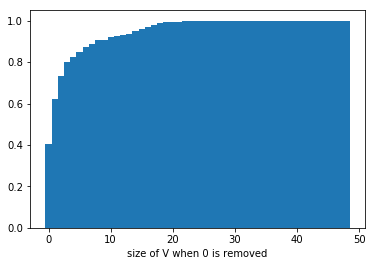

In [6]:
########################### Copying from the other estimators
%matplotlib inline
values100, bins, _ =plt.hist(SimCF['50'], bins=range(0,50),normed=True)#Check  this!!
plt.ylabel('');
plt.xlabel('size of V when 0 is removed')
#----------------
values=list(values100)
values2=list(values100)
for i in range(0,len(values)):
    values2[i]=sum(values[:i+1])

%matplotlib inline
plt.bar(range(len(values)), values2,1)

#values, bins, _ =plt.hist(results_cs_100, bins=100,normed=True)
plt.ylabel('');
plt.xlabel('size of V when 0 is removed')
#----------------
i=0
I=0
p=.8
while values2[i]<p:
    i=i+1

print 'stop when',i,'vertices remained to guarantee p>=',p 
print 'Is this the value of K wanted?'